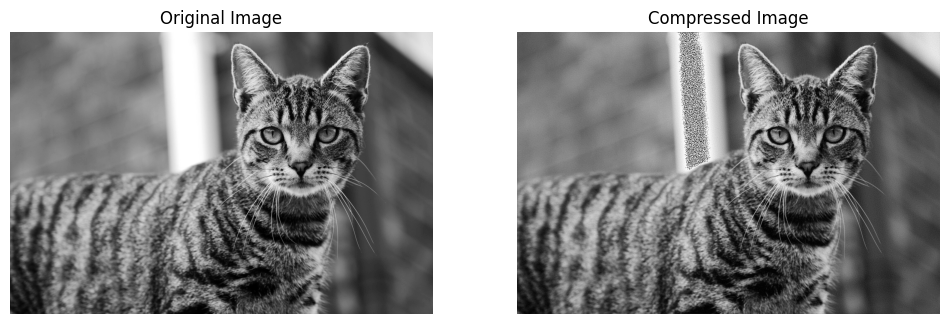

(<PIL.Image.Image image mode=L size=2048x1365>,
 array([[188.14833495, 188.8999136 , 183.47618989, ..., 172.14576332,
         179.91098949, 186.62717842],
        [176.20993097, 179.84492366, 182.39309742, ..., 167.40065792,
         169.57329608, 173.94149368],
        [168.0932192 , 163.8827955 , 165.28402127, ..., 164.95106194,
         166.63960598, 167.41879528],
        ...,
        [168.0932192 , 167.41879528, 166.63960598, ..., 173.85443319,
         165.28402127, 163.8827955 ],
        [176.20993097, 173.94149368, 169.57329608, ..., 181.59032405,
         182.39309742, 179.84492366],
        [188.14833495, 186.62717842, 179.91098949, ..., 179.27916475,
         183.47618989, 188.8999136 ]]))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def compress_and_display_image(image_path, compression_rate):
    compression_rate = max(0, min(100, compression_rate))
    image = Image.open(image_path).convert('L')
    f = np.fft.fftshift(np.fft.fft2(image))
    magnitude_spectrum = 20 * np.log(np.abs(f))
    threshold = np.percentile(magnitude_spectrum.flatten(), compression_rate)
    f[magnitude_spectrum < threshold] = 0
    img_back = np.abs(np.fft.ifft2(np.fft.ifftshift(f)))
    compressed_image = Image.fromarray(img_back.astype('uint8'))

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis("off")

    plt.subplot(122)
    plt.imshow(compressed_image, cmap='gray')
    plt.title('Compressed Image')
    plt.axis("off")

    plt.show()

    return compressed_image, magnitude_spectrum

compress_and_display_image('/content/cat.jpg', 90)